[Question 1]                     [10 points] 
 
Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural 
network with backpropagation for regression using the Mean Square Error loss. Assume that you 
are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different 
from the update rule for the network trained for binary classification using log loss. 

[Question 2]                     [40 points] 
 
For the given data on canvas, construct a neural network for the regression task. Your network 
must have 1 hidden layer and 1 output layer. Use sigmoid to be your activation function for the 
hidden layer(s). You can choose the number of neurons in each layer using your intuition.  
 
The  data  is  already  split  to  have  your  input  data  for  training  (X_train.csv)  and  testing 
(X_train.csv)  and  their  corresponding  target  values  Y_train.csv  and  Y_test.csv, 
respectively. You can load the data as follows: 
 
X_train = np.loadtxt("X_train.csv") 
 
Implement the backpropagation algorithm and train your network until convergence.  
 
Answer the following questions: 
1.  What is the activation function that you will choose for the output layer? Justify your answer 
briefly. 
2.  How many neurons should there be in the output layer? Why? 
3.  Report the average MSE loss and the accuracy. 
4.  Plot the loss and accuracy as a function of the number of iterations.  
5.  What is the effect of the learning rate on the training process? Vary the learning rate to be 
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate. 
6.  What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following: 
    
    a.  You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not? 
    
    b.  Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description. 
    
7.  What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.  
    
    
    a. Will you need to change the update rule? 
    
    b. What is the change that you need to make to achieve this experiment? 
    
    c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.loadtxt("/content/drive/MyDrive/X_train.csv")
Y_train = np.loadtxt("/content/drive/MyDrive/Y_train.csv")

X_test = np.loadtxt("/content/drive/MyDrive/X_test.csv")
Y_test = np.loadtxt("/content/drive/MyDrive/Y_test.csv")
len(Y_test)

50

In [2]:
# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

1. What is the activation function that you will choose for the output layer? Justify your answer briefly. 
> Since output (y) is continuous-values, it is a regression problem. All the non-trivial acirivation functions work for classification only. So we use identity function as for the activation in the output layer. 

2. How many neurons should there be in the output layer? Why?
> Since the elements of the output y are one-dimensional, there has to be only one neuron to match the output.

In [3]:
# Backprop
def backprop(X_data, Y_data, neurons, alpha, it):
    
    dim = len(Y_data)
    W1 = np.random.rand(neurons,2)
    b1 = np.random.rand(neurons,1)
    W2 = np.random.rand(1,neurons)
    b2 = np.random.rand(1,1)

    for k in range(it):
#         taking index for analyzing indivudual i-th data
        i = np.random.randint(0,dim)
        x = X_data[i]
        x = x.reshape(2,1)
        z1 = W1 @ x + b1
        a1 = sigmoid(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = z2

        dz2 = (a2 - Y_data[i]) 
        dW2 = np.dot(dz2, a1.T)
        db2 = dz2
        dz1 = np.dot(W2.T, dz2) * sigmoid_derivative(z1)
        dW1 = np.dot(dz1, x.T)
        db1 = dz1
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        b1 = b1 - alpha * db1
        b2 = b2 - alpha * db2
        
#     reading all the final values from revised weights after iterations
    z1New = np.array([])
    for i in range(dim):
        x = X_data[i]
        x = x.reshape(2,1)
        z1New = np.append(z1New, W1 @ x + b1)
    z1New = z1New.reshape(dim,neurons,1)

    a2New = np.array([])
    for i in range(dim):
        a1New = sigmoid(z1New[i])
        z2New = np.dot(W2, a1New) + b2
        a2New = np.append(a2New, z2New) 
    mse = 1/(2*dim) * np.sum(np.square(a2New-Y_data))
    return W1, W2, b1, b2, a2New, mse

In [61]:
output_10neurons_1k = backprop(X_train, Y_train, 10, .01, 1000)
print(output_10neurons_1k[-1]) 

99.19429484148351


3. Report the average MSE loss and the accuracy. 
> We just showed average MSE loss is 99.194 for 10 neurons in the hidden layer with 1000 iterations. Learning rate was 0.01.

4. Plot the loss and accuracy as a function of the number of iterations.
> plot generated below

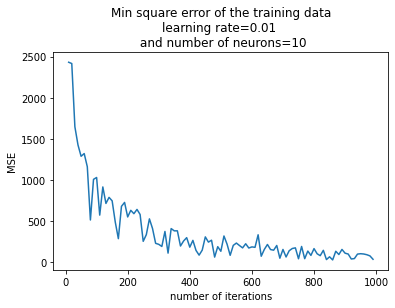

In [33]:
# plotting MSE wrt iteration
it_set = np.arange(10,1000,10)
mse_set_it = []
for it in it_set:
    output = backprop(X_train, Y_train, 10, .01, it)
#     the last element of output tuple is the mse, 
#     therefore mse = output[-1]
    mse_set_it.append(output[-1])
plt.plot(it_set,mse_set_it,'-')
plt.xlabel('number of iterations')
plt.ylabel('MSE')
plt.title('Min square error of the training data\nlearning rate=0.01 \n and number of neurons=10')
plt.show()

5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.
> plot generated below

<ipython-input-2-127d88f28bc4>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
<ipython-input-3-db7ec45705fc>:24: RuntimeWarning: invalid value encountered in multiply
  dz1 = np.dot(W2.T, dz2) * sigmoid_derivative(z1)


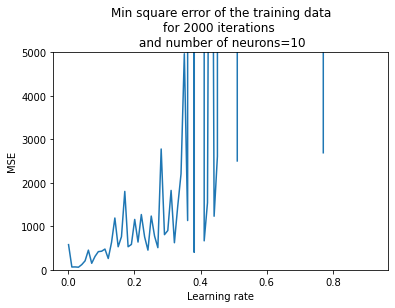

In [67]:
alpha_set = np.arange(0.001,1,0.01)
mse_set_alpha = []
it = 2000
for alpha in alpha_set:
    output = backprop(X_train, Y_train, 10, alpha, it)
    mse_set_alpha = np.append(mse_set_alpha,output[-1])

plt.plot(alpha_set,mse_set_alpha)
plt.xlabel('Learning rate')
plt.ylabel('MSE')
plt.ylim([0,5000])
plt.title('Min square error of the training data\nfor '+str(it)+' iterations \n and number of neurons=10')
plt.show()

In [14]:
def Optimization(X_data, Y_data, N, sample):
#     N = neurons in the hidden layer
    MSE_list = []
    for neuron in range(1,N+1):
        val = []
        for i in range(sample):
            W1, W2, b1, b2, prediction, mse = backprop(X_data, Y_data, neuron, .01, 100)
            val.append(mse)
        MSE_list.append(min(val))
    return MSE_list

In [15]:
MSE_list = Optimization(X_train, Y_train, 10, 200)

6. What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:

    a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?
    > it doesn't change. The derivatives are expressed as matrix multiplication. The number of neurons only change the dimensions of the matrices where appropriate. The rule will hold the same as there is no functional variance.  

    b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.


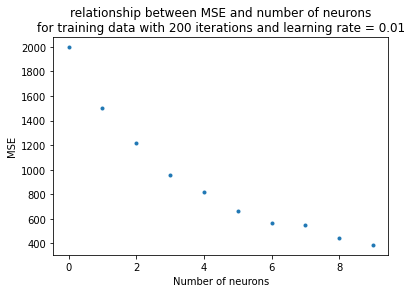

In [60]:
plt.plot(MSE_list,'.')
plt.xlabel('Number of neurons')
plt.ylabel('MSE')
plt.title('relationship between MSE and number of neurons\nfor training data with 200 iterations and learning rate = 0.01')
plt.show()

We can see 10 neurons in the hidden layer give the minimum MSE. So we increase the number of iterations to have better MSE for 10 neurons.

In [77]:
# we find the best weights and biases for some given number of neurons
# out of samples of the same computation
def BestParameters(X_data, Y_data, neuron, sample):
#     neuron = neurons in the hidden layer
    val = []
    for i in range(sample):
        W1, W2, b1, b2, pred, mse = backprop(X_data, Y_data, neuron, .01, 1000)
        val.append(mse)
        if min(val) == mse:
            stored_W1 = W1
            stored_W2 = W2
            stored_b1 = b1
            stored_b2 = b2
            mse_final = mse
            prediction = pred
    return W1, W2, b1, b2

# reading the parameters off
W1, W2, b1, b2 = BestParameters(X_train, Y_train, 10, 1000)

> Warning: If you run the previous cell, you will get different parameter values for W1,W2,b1,b2 than I got, therefore, following MSE values and plots for training and test data will vary to some extent. However, it is still acceptable.

We construct the neural network using the same weights and bias terms

In [74]:
def NeuralNetwork(X_data,Y_data):
    pred_array = np.array([])
    dim = len(Y_data)
    for i in range(dim):
        x = X_data[i]
        x = x.reshape(2,1)
        z1 = W1 @ x + b1
        a1 = sigmoid(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = z2
        pred_array = np.append(pred_array,a2)
    
    mse = 1/(2*dim) * np.sum(np.square(pred_array-Y_data))
    return mse, pred_array

6. 
    b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.
    > We plot the predictions for training data and test data below with the best parameters found from the training data. The predictions and true values seem to be in agreement.

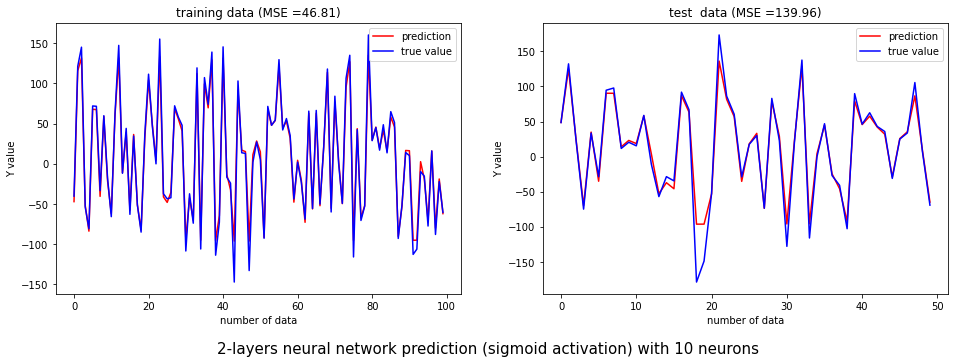

<Figure size 432x288 with 0 Axes>

In [252]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
plt.figure()

mse_train, prediction_train = NeuralNetwork(X_train,Y_train)
mse_test, prediction_test = NeuralNetwork(X_test,Y_test)

prediction_train = prediction_train.flatten()
axes[0].plot(prediction_train,label='prediction',color='r')
axes[0].plot(Y_train,label='true value',color='b')
axes[0].set_xlabel('number of data')
axes[0].set_ylabel('Y value')
axes[0].set_title('training data (MSE ='+str(np.round(mse_train,2))+')')
axes[0].legend()
# plt.show()

prediction_test = prediction_test.flatten()
axes[1].plot(prediction_test,label='prediction',color='r')
axes[1].plot(Y_test,label='true value',color='b')
axes[1].set_xlabel('number of data')
axes[1].set_ylabel('Y value')
axes[1].set_title('test  data (MSE ='+str(np.round(mse_test,2))+')')
axes[1].legend()

fig.text(0.5, -0.04, '2-layers neural network prediction (sigmoid activation) with 10 neurons', ha='center', size=15) 
plt.savefig('neural_network_sigmoid.png', dpi=600)
plt.show()

7. What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.

    a. Will you need to change the update rule? 
    > Yes. 

    b. What is the change that you need to make to achieve this experiment? 
    > If activation function changes, so its derivative must be chaned accordingly.

    c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

We define backprop functions for tanh and ReLU functions and evaluate prediction for 10 neurons, 0.01 learning rate, and 1000 iterations.

#####  tanh as the hidden layer activation function

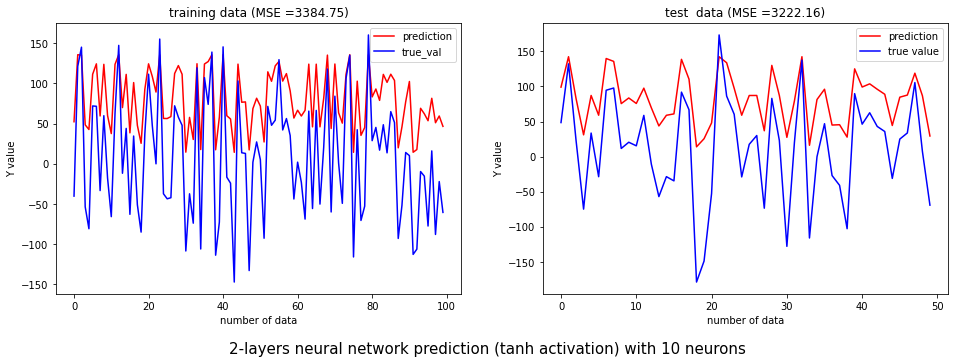

<Figure size 432x288 with 0 Axes>

In [120]:
def backprop_tanh(X_data, Y_data, neurons, alpha, it):
    
    dim = len(Y_data)
    W1 = np.random.rand(neurons,2)
    b1 = np.random.rand(neurons,1)
    W2 = np.random.rand(1,neurons)
    b2 = np.random.rand(1,1)

    for k in range(it):
#         taking index for analyzing indivudual i-th data
        i = np.random.randint(0,dim)
        x = X_data[i]
        x = x.reshape(2,1)
        z1 = W1 @ x + b1
        a1 = np.tanh(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = z2

        dz2 = (a2 - Y_data[i]) 
        dW2 = np.dot(dz2, a1.T)
        db2 = dz2
        dz1 = np.dot(W2.T, dz2) * (1 - np.tanh(z1)**2)
        dW1 = np.dot(dz1, x.T)
        db1 = dz1
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        b1 = b1 - alpha * db1
        b2 = b2 - alpha * db2
        
#     reading all the final values from revised weights after iterations
    z1New = np.array([])
    for i in range(dim):
        x = X_data[i]
        x = x.reshape(2,1)
        z1New = np.append(z1New, W1 @ x + b1)
    z1New = z1New.reshape(dim,neurons,1)

    a2New = np.array([])
    for i in range(dim):
        a1New = np.tanh(z1New[i])
        z2New = np.dot(W2, a1New) + b2
        a2New = np.append(a2New, z2New) 
    mse = 1/(2*dim) * np.sum(np.square(a2New-Y_data))
    return W1, W2, b1, b2, a2New, mse

def BestParameters_tanh(X_data, Y_data, neuron, sample):
#     neuron = neurons in the hidden layer
    val = []
    for i in range(sample):
        W1, W2, b1, b2, pred, mse = backprop_tanh(X_data, Y_data, neuron, .01, 1000)
        val.append(mse)
        if min(val) == mse:
            stored_W1 = W1
            stored_W2 = W2
            stored_b1 = b1
            stored_b2 = b2
            mse_final = mse
            prediction = pred
    return W1, W2, b1, b2

def NeuralNetwork_tanh(X_data,Y_data):
    W1, W2, b1, b2 = BestParameters_tanh(X_train, Y_train, 10, 1000)
    pred_array = np.array([])
    dim = len(Y_data)
    for i in range(dim):
        x = X_data[i]
        x = x.reshape(2,1)
        z1 = W1 @ x + b1
        a1 = sigmoid(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = z2
        pred_array = np.append(pred_array,a2)
    
    mse = 1/(2*dim) * np.sum(np.square(pred_array-Y_data))
    return mse, pred_array

fig, axes = plt.subplots(1,2, figsize=(16,5))
plt.figure()

mse_train, prediction_train = NeuralNetwork_tanh(X_train,Y_train)
mse_test, prediction_test = NeuralNetwork_tanh(X_test,Y_test)

prediction_train = prediction_train.flatten()
axes[0].plot(prediction_train,label='prediction',color='r')
axes[0].plot(Y_train,label='true value',color='b')
axes[0].set_xlabel('number of data')
axes[0].set_ylabel('Y value')
axes[0].set_title('training data (MSE ='+str(np.round(mse_train,2))+')')
axes[0].legend()
# plt.show()

prediction_test = prediction_test.flatten()
axes[1].plot(prediction_test,label='prediction',color='r')
axes[1].plot(Y_test,label='true value',color='b')
axes[1].set_xlabel('number of data')
axes[1].set_ylabel('Y value')
axes[1].set_title('test  data (MSE ='+str(np.round(mse_test,2))+')')
axes[1].legend()

fig.text(0.5, -0.04, '2-layers neural network prediction (tanh activation) with 10 neurons', ha='center', size=15) 
plt.savefig('neural_network_tanh.png', dpi=600)
plt.show()

#####  linear function as the hidden layer activation function

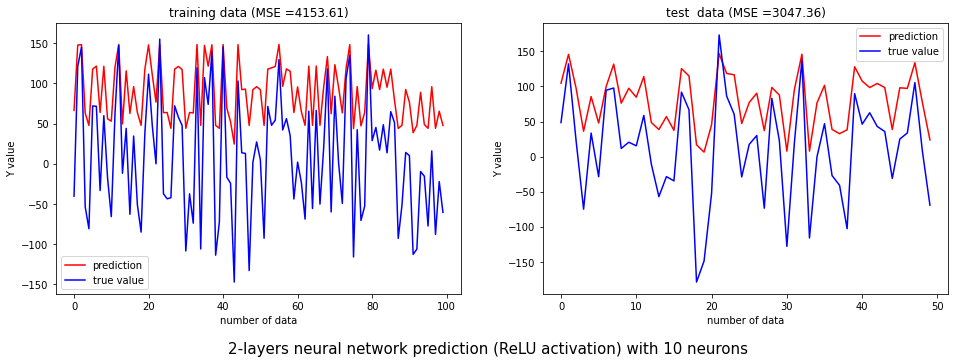

<Figure size 432x288 with 0 Axes>

In [254]:
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return np.heaviside(x,0)

def backprop_relu(X_data, Y_data, neurons, alpha, it):
    
    dim = len(Y_data)
    W1 = np.random.rand(neurons,2)
    b1 = np.random.rand(neurons,1)
    W2 = np.random.rand(1,neurons)
    b2 = np.random.rand(1,1)

    for k in range(it):
#         taking index for analyzing indivudual i-th data
        i = np.random.randint(0,dim)
        x = X_data[i]
        x = x.reshape(2,1)
        z1 = W1 @ x + b1
        a1 =relu(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = z2

        dz2 = (a2 - Y_data[i]) 
        dW2 = np.dot(dz2, a1.T)
        db2 = dz2
        dz1 = np.dot(W2.T, dz2) * relu_derivative(z1)
        dW1 = np.dot(dz1, x.T)
        db1 = dz1
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        b1 = b1 - alpha * db1
        b2 = b2 - alpha * db2
        
#     reading all the final values from revised weights after iterations
    z1New = np.array([])
    for i in range(dim):
        x = X_data[i]
        x = x.reshape(2,1)
        z1New = np.append(z1New, W1 @ x + b1)
    z1New = z1New.reshape(dim,neurons,1)

    a2New = np.array([])
    for i in range(dim):
        a1New = relu(z1New[i])
        z2New = np.dot(W2, a1New) + b2
        a2New = np.append(a2New, z2New) 
    mse = 1/(2*dim) * np.sum(np.square(a2New-Y_data))
    return W1, W2, b1, b2, a2New, mse

def BestParameters_relu(X_data, Y_data, neuron, sample):
#     neuron = neurons in the hidden layer
    val = []
    for i in range(sample):
        W1, W2, b1, b2, pred, mse = backprop_tanh(X_data, Y_data, neuron, .01, 1000)
        val.append(mse)
        if min(val) == mse:
            stored_W1 = W1
            stored_W2 = W2
            stored_b1 = b1
            stored_b2 = b2
            mse_final = mse
            prediction = pred
    return W1, W2, b1, b2

def NeuralNetwork_relu(X_data,Y_data):
    W1, W2, b1, b2 = BestParameters_relu(X_train, Y_train, 10, 1000)
    pred_array = np.array([])
    dim = len(Y_data)
    for i in range(dim):
        x = X_data[i]
        x = x.reshape(2,1)
        z1 = W1 @ x + b1
        a1 = sigmoid(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = z2
        pred_array = np.append(pred_array,a2)
    
    mse = 1/(2*dim) * np.sum(np.square(pred_array-Y_data))
    return mse, pred_array

fig, axes = plt.subplots(1,2, figsize=(16,5))
plt.figure()

mse_train, prediction_train = NeuralNetwork_relu(X_train,Y_train)
mse_test, prediction_test = NeuralNetwork_relu(X_test,Y_test)

prediction_train = prediction_train.flatten()
axes[0].plot(prediction_train,label='prediction',color='r')
axes[0].plot(Y_train,label='true value',color='b')
axes[0].set_xlabel('number of data')
axes[0].set_ylabel('Y value')
axes[0].set_title('training data (MSE ='+str(np.round(mse_train,2))+')')
axes[0].legend()
# plt.show()

prediction_test = prediction_test.flatten()
axes[1].plot(prediction_test,label='prediction',color='r')
axes[1].plot(Y_test,label='true value',color='b')
axes[1].set_xlabel('number of data')
axes[1].set_ylabel('Y value')
axes[1].set_title('test  data (MSE ='+str(np.round(mse_test,2))+')')
axes[1].legend()

fig.text(0.5, -0.04, '2-layers neural network prediction (ReLU activation) with 10 neurons', ha='center', size=15) 
plt.savefig('neural_network_relu.png', dpi=600)
plt.show()

7. 
    c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.
    > We plotted the predictions for tanh and ReLU activation in the last two cells. MSE is larger than 3000 for both activations, for the same learning rate and iteration number used for sigmoid. Sigmoid appears to be the best activation function for the given data.